# Classification - TelecomChurn Dataset


**Variables:**

* `State`: State in which the customer resides.

* `Account length:` The number of days the customer has been with the company.

* `Area code:` The area code of the caller.

* `International Plan:` Whether the customer has an international calling plan.

* `Voice mail plan:` Whether the customer has a voice mail plan.

* `Number vmail messages:` The number of voice mail messages received.

* `Total day minutes:` Total minutes of voice calls during the day.

* `Total day calls:` Total number of voice calls during the day.

* `Total day charge:` Total charge for voice calls during the day.

* `Total eve minutes:` Total minutes of voice calls during the evening.

* `Total eve calls:` Total number of voice calls during the evening.

* `Total eve charge:` Total charge for voice calls during the evening.

* `Total night minutes:` Total number of minutes of voice calls during the night.

* `Total night calls:` Total number of voice calls during the night.

* `Total night charge:` Total charge for voice calls during the night.

* `Total intl minutes:` Total number of minutes spent on international calls.

* `Total intl calls:` Total number of international calls.

* `Total intl charge:` Total charge for international calls.

* `Customer service calls:` Number of customer service calls made.

* `Churn:` Whether the customer churned.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
tel = pd.read_csv("Datasets/TelecomChurn.csv")

In [4]:
print("Shape of tel: {}".format(tel.shape))
print("\nVariable types: \n{}".format(tel.dtypes))

Shape of tel: (3333, 20)

Variable types: 
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


In [5]:
tel.columns = ['state','account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages',
              'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
              'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes',
              'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']

In [6]:
# Target
target = ['churn']
# Categorical predictors
categorical_predictors = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
# Numerical predictors
numerical_predictors = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 
                        'total_eve_minutes', 'total_eve_calls','total_eve_charge', 'total_night_minutes', 'total_night_calls', 
                        'total_night_charge', 'total_intl_minutes','total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# Numerical Variables

In [7]:
numerical_data = tel[numerical_predictors]

In [8]:
numerical_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
numerical_data.isna().sum()

account_length            0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
dtype: int64

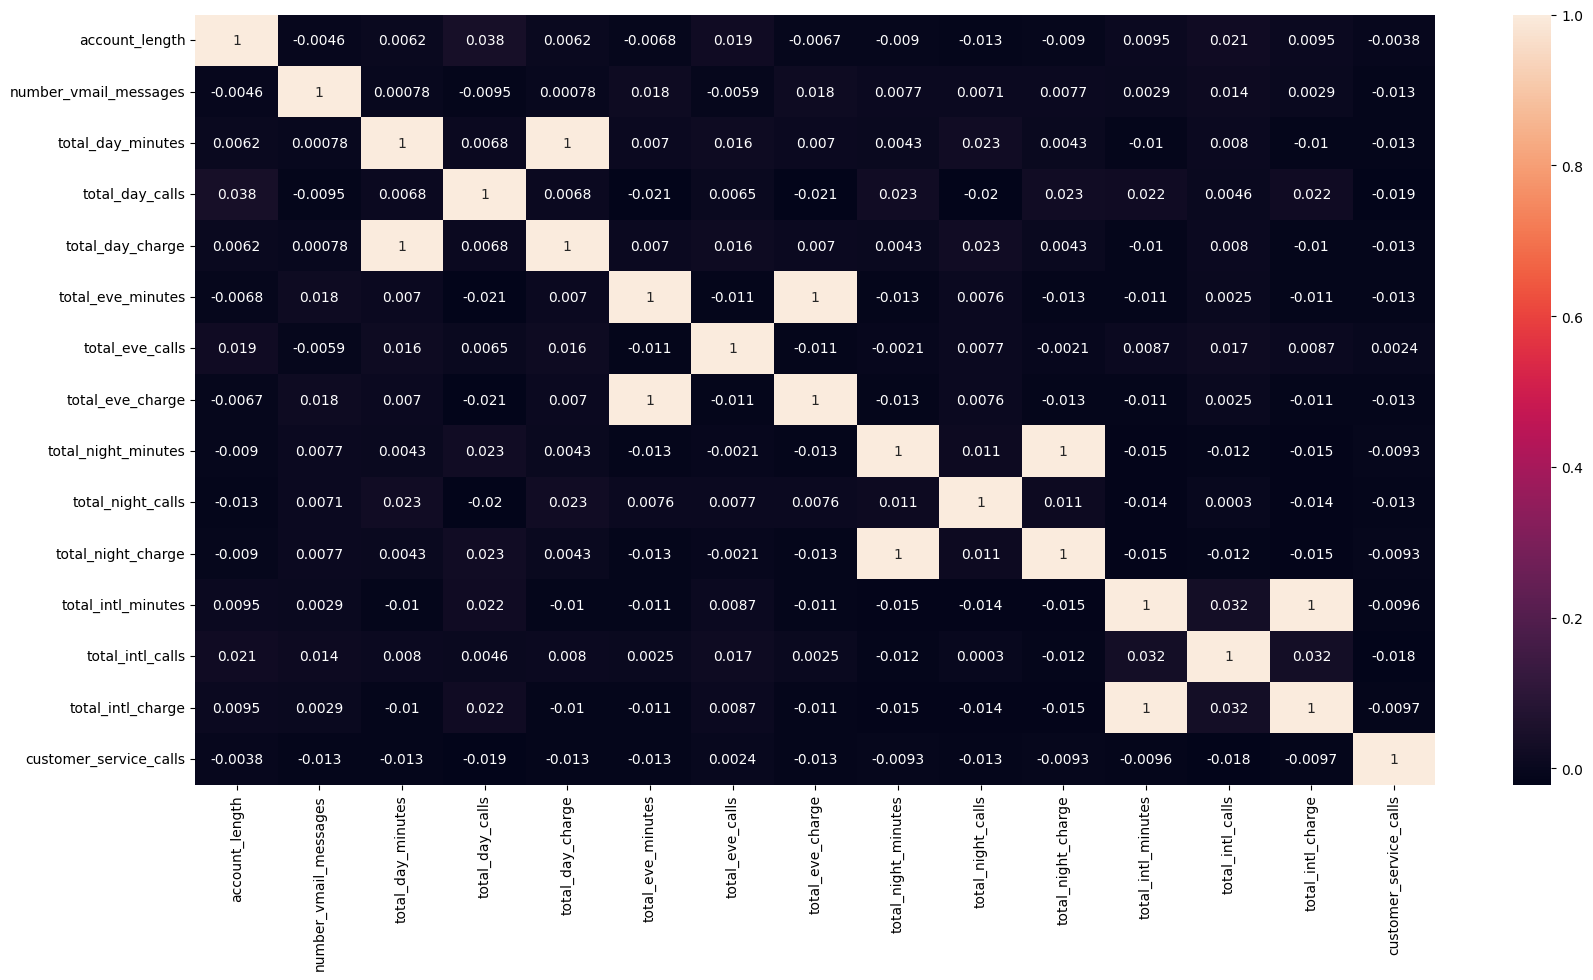

In [10]:
# Corrplot
plt.figure(figsize=(20, 10))

ax = sns.heatmap(numerical_data.corr(), annot=True)

# We remove total_day_charge and keep minutes.

In [11]:
# Data split into true and false churns
churn_true = tel[tel['churn'] == True]
churn_false = tel[tel['churn'] == False]

**Total Day Minutes**

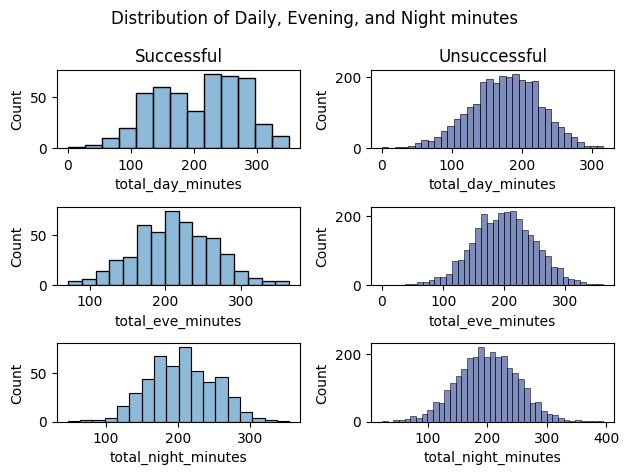

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.suptitle(t="Distribution of Daily, Evening, and Night minutes")

axes[0, 0].set_title("Successful")
sns.histplot(data=churn_true, x=churn_true['total_day_minutes'],hue=churn_true['churn'], ax=axes[0, 0], legend=False)
sns.histplot(data=churn_true, x=churn_true['total_eve_minutes'], hue=churn_true['churn'], ax=axes[1, 0], legend=False)
sns.histplot(data=churn_true, x=churn_true['total_night_minutes'],hue=churn_true['churn'],ax=axes[2, 0], legend=False)

axes[0, 1].set_title("Unsuccessful")
sns.histplot(data=churn_false, x=churn_false['total_day_minutes'],hue=churn_false['churn'], ax=axes[0, 1], legend=False, palette='dark')
sns.histplot(data=churn_false, x=churn_false['total_eve_minutes'], hue=churn_false['churn'], ax=axes[1, 1], legend=False, palette='dark')
sns.histplot(data=churn_false, x=churn_false['total_night_minutes'],hue=churn_false['churn'],ax=axes[2, 1], legend=False, palette='dark')

fig.tight_layout()
plt.show()


**Total Day Calls**

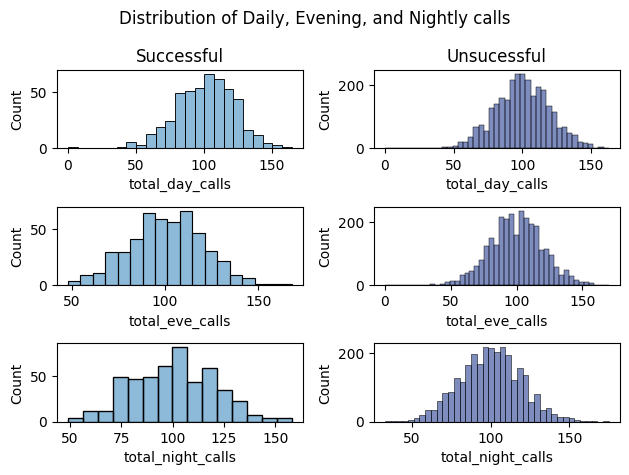

<Figure size 2000x2000 with 0 Axes>

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2)
plt.suptitle(t="Distribution of Daily, Evening, and Nightly calls")
plt.figure(figsize=(20, 20))

axes[0, 0].set_title('Successful')
sns.histplot(data=churn_true, x=churn_true['total_day_calls'], hue=churn_true['churn'], ax=axes[0, 0], legend=False)
sns.histplot(data=churn_true, x=churn_true['total_eve_calls'], hue=churn_true['churn'],ax=axes[1, 0], legend=False)
sns.histplot(data=churn_true,x=churn_true['total_night_calls'],hue=churn_true['churn'],ax=axes[2, 0], legend=False)
###
axes[0, 1].set_title("Unsucessful")
sns.histplot(data=churn_false, x=churn_false['total_day_calls'],hue=churn_false['churn'],ax=axes[0, 1],legend=False, palette='dark')
sns.histplot(data=churn_false, x=churn_false['total_eve_calls'],hue=churn_false['churn'],ax=axes[1, 1], legend=False, palette='dark')
sns.histplot(data=churn_false, x=churn_false['total_night_calls'],hue=churn_false['churn'],ax=axes[2, 1],legend=False, palette='dark')

fig.tight_layout()
plt.show()

**Total International Minutes**

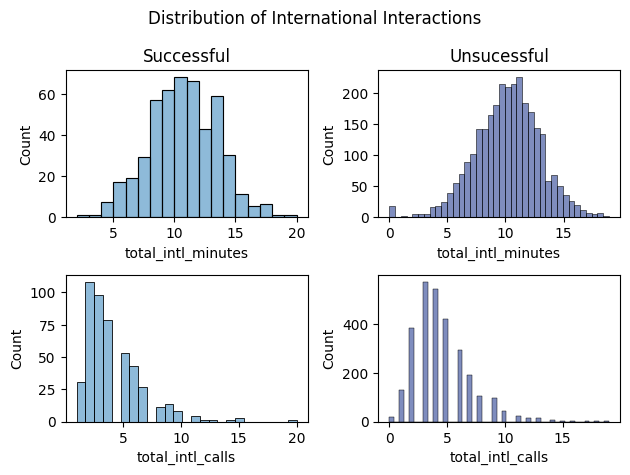

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.suptitle(t="Distribution of International Interactions")

axes[0, 0].set_title("Successful")
sns.histplot(data=churn_true, x=churn_true['total_intl_minutes'], hue=churn_true['churn'],ax=axes[0, 0],legend=False, )
sns.histplot(data=churn_true,x=churn_true['total_intl_calls'], hue=churn_true['churn'],ax=axes[1, 0],legend=False)

axes[0, 1].set_title("Unsucessful")
sns.histplot(data=churn_false,x=churn_false['total_intl_minutes'],hue=churn_false['churn'],ax=axes[0, 1],legend=False,palette='dark')
sns.histplot(data=churn_false,x=churn_false['total_intl_calls'],hue=churn_false['churn'],ax=axes[1, 1],legend=False, palette='dark')

fig.tight_layout()
plt.show()

**Customer Service Calls**

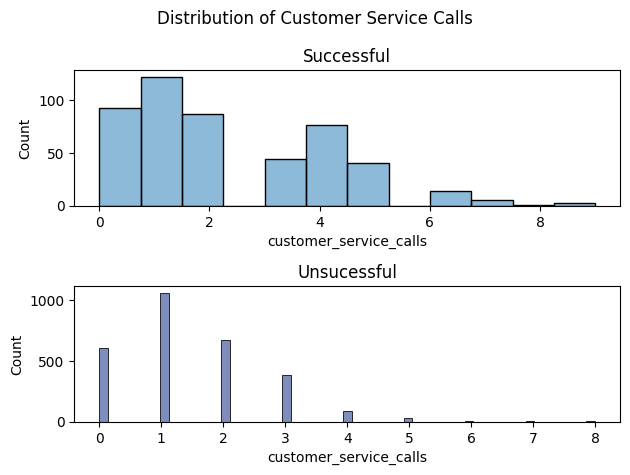

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.suptitle(t="Distribution of Customer Service Calls")

axes[0].set_title("Successful")
sns.histplot(data=churn_true,x=churn_true['customer_service_calls'],hue=churn_true['churn'],ax=axes[0],legend=False)

axes[1].set_title("Unsucessful")
sns.histplot(data=churn_true,x=churn_false['customer_service_calls'],hue=churn_false['churn'],ax=axes[1],legend=False, palette='dark')

fig.tight_layout()
plt.show()

## Categorical Variables

In [16]:
categorical_data = tel[categorical_predictors]
print("Shape of categorical data: {}".format(categorical_data.shape))

Shape of categorical data: (3333, 4)


In [17]:
print(categorical_data)

     state  area_code international_plan voice_mail_plan
0       KS        415                 No             Yes
1       OH        415                 No             Yes
2       NJ        415                 No              No
3       OH        408                Yes              No
4       OK        415                Yes              No
...    ...        ...                ...             ...
3328    AZ        415                 No             Yes
3329    WV        415                 No              No
3330    RI        510                 No              No
3331    CT        510                Yes              No
3332    TN        415                 No             Yes

[3333 rows x 4 columns]


**International and Voice Mail Plans**

In [18]:

print("Sum of Customers with a Voice Mail Plan: {}".format(sum(categorical_data['voice_mail_plan'] == "Yes")))
print("Sum of Customers without a Voice Mail Plan: {}".format(sum(categorical_data['voice_mail_plan'] == "No")))

print("\nSum of Customers with an International Plan: {}".format(sum(categorical_data['international_plan'] == "Yes")))
print("Sum of Customer without an International Plan: {}".format(sum(categorical_data['international_plan'] == "No")))


Sum of Customers with a Voice Mail Plan: 922
Sum of Customers without a Voice Mail Plan: 2411

Sum of Customers with an International Plan: 323
Sum of Customer without an International Plan: 3010


In [19]:
# Use: This function performs binary encoding for telechurn dataset  
# Input: String 
# Output: Binary

def bin(variable):
    for i in range(len(variable)):
        
        if(variable[i] == "Yes"):
            variable[i] = 1
        else: 
            variable[i] = 0
    
    return variable

In [ ]:
tel['international_plan'] = bin(tel['international_plan'])
tel['voice_mail_plan'] = bin(tel['voice_mail_plan'])

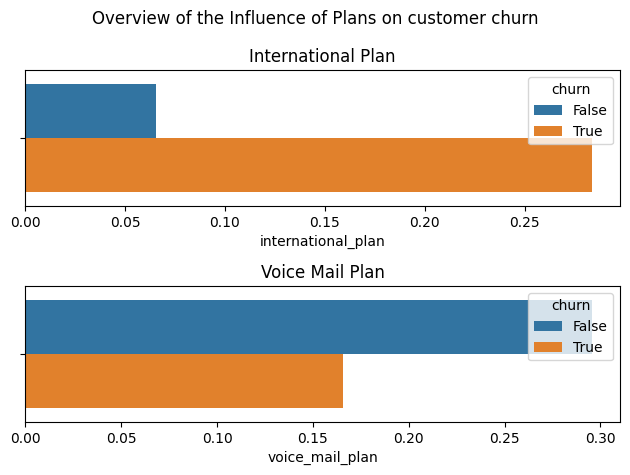

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1)
plt.suptitle("Overview of the Influence of Plans on customer churn")

axes[0].set_title("International Plan")
sns.barplot(data=tel, x=tel['international_plan'], hue=tel['churn'], ax=axes[0], errorbar=None)

axes[1].set_title("Voice Mail Plan")
sns.barplot(data=tel,x=tel['voice_mail_plan'],hue=tel['churn'],ax=axes[1], errorbar=None)


fig.tight_layout()
plt.show()

**State**

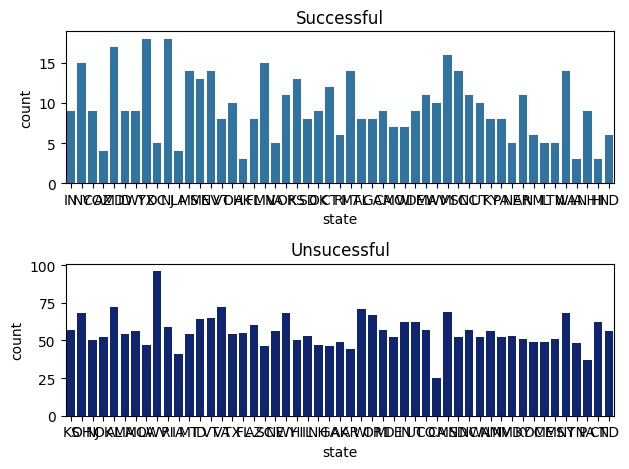

<Figure size 2000x2000 with 0 Axes>

In [22]:

fig, axes = plt.subplots(nrows=2,ncols=1)
plt.figure(figsize=(20, 20))
plt.suptitle(t="Overview of Customer Churn per state")

axes[0].set_title("Successful")
sns.countplot(data=churn_true, x=churn_true['state'],hue=churn_true['churn'], ax=axes[0], legend=False)

axes[1].set_title("Unsucessful")
sns.countplot(data=churn_false, x=churn_false['state'], hue=churn_false['churn'],ax=axes[1],legend=False, palette= 'dark')

fig.tight_layout()
plt.show()

In [181]:
# Prop table
prop_table = pd.crosstab(tel['state'], tel['churn'], normalize='index')


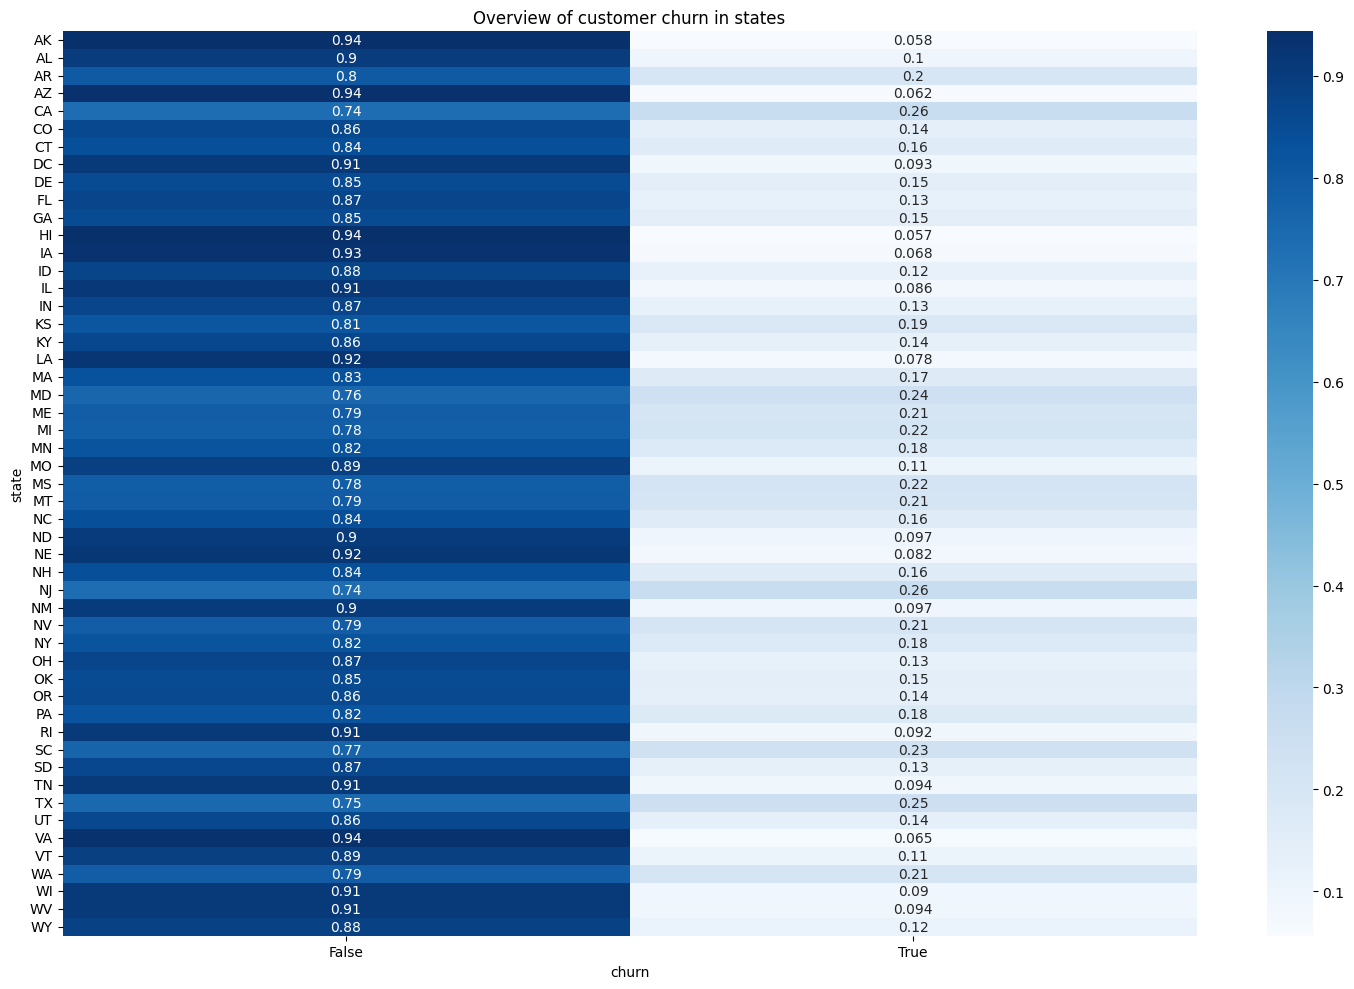

In [183]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=prop_table, annot=True, cmap='Blues')
plt.title("Overview of customer churn in states")

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

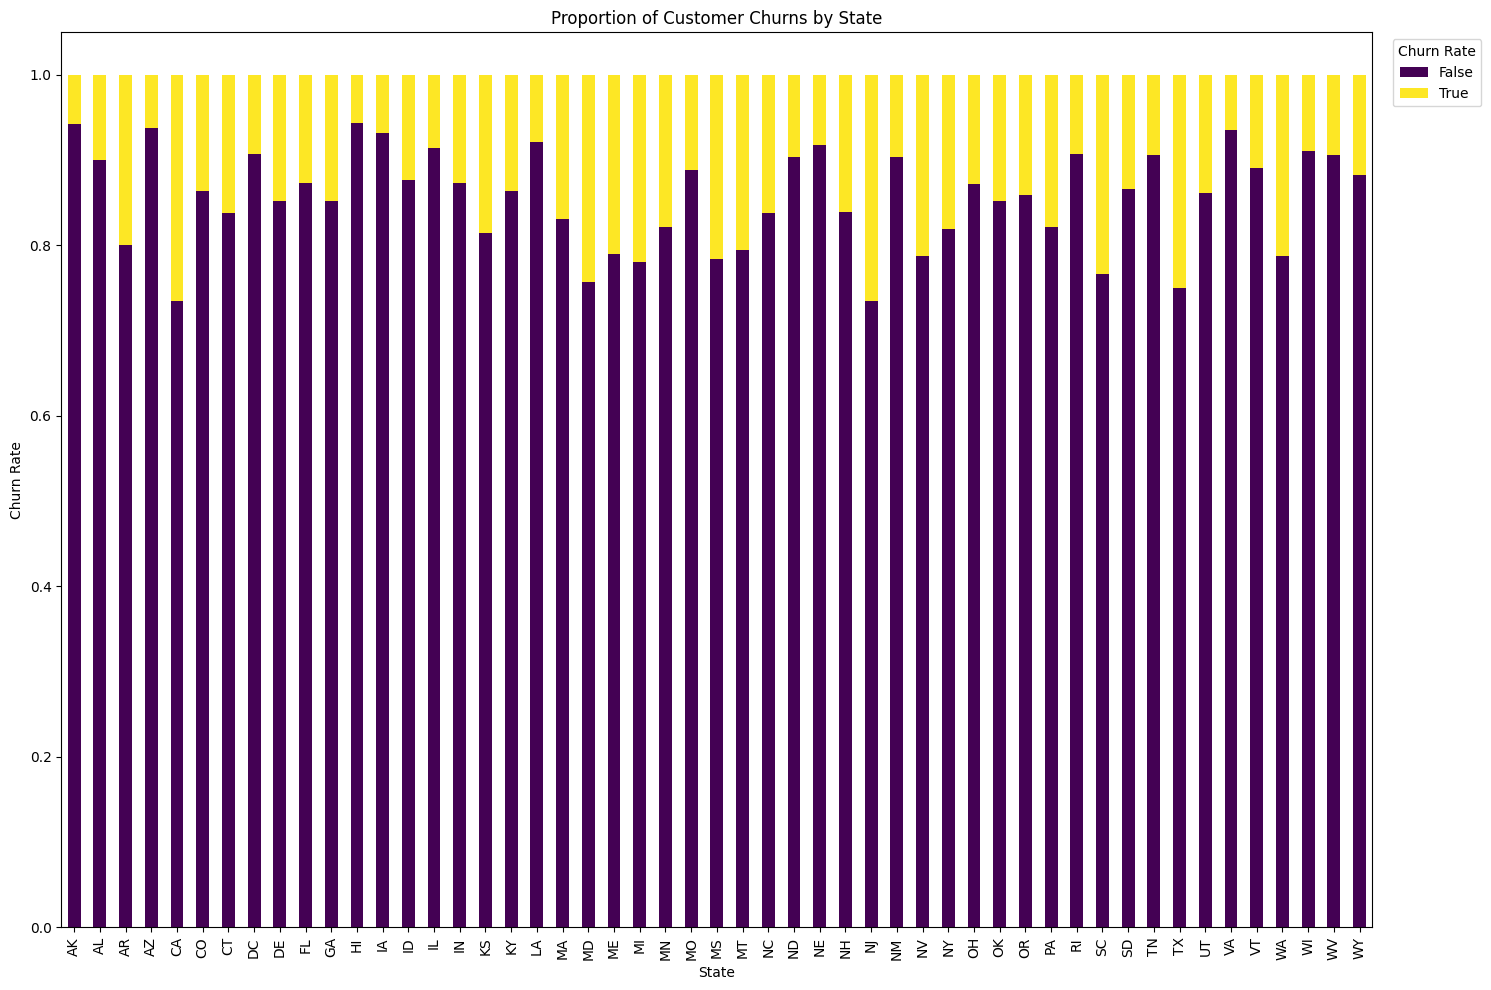

In [185]:
plt.figure(figsize=(15, 10))
prop_table.plot(kind='bar', stacked=True, figsize=(15,10), colormap='viridis')
plt.title("Proportion of Customer Churns by State")
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.legend(title='Churn Rate', bbox_to_anchor=(1.01,1),loc='upper left')

plt.tight_layout()
plt.show()

**Area Code**

<Figure size 1500x1000 with 0 Axes>

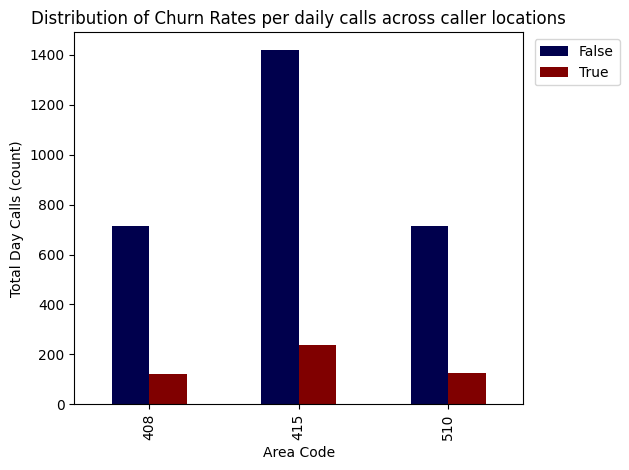

In [188]:
prop_table = pd.crosstab(index=tel['area_code'], 
                         columns=tel['churn'],
                         values=tel['total_day_calls'],
                         aggfunc='count')

plt.figure(figsize=(15, 10))
prop_table.plot(kind='bar', colormap = 'seismic')
plt.title(label="Distribution of Churn Rates per daily calls across caller locations",loc='center')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xlabel("Area Code")
plt.ylabel("Total Day Calls (count)")

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

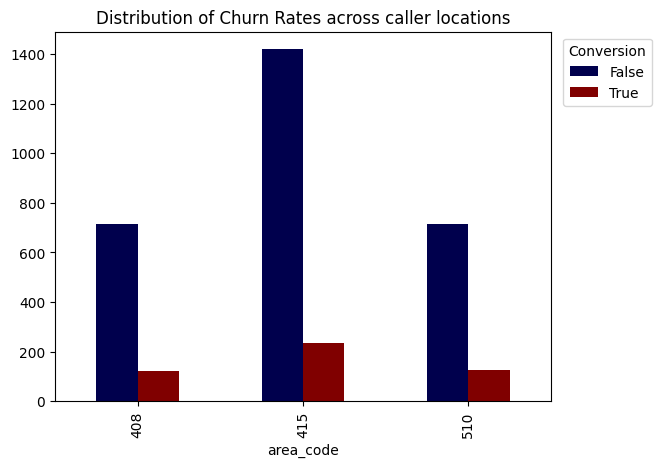

In [187]:
prop_table = pd.crosstab(index=tel['area_code'], 
                        columns=tel['churn'], values=tel.index.size,aggfunc='count')
plt.figure(figsize=(15, 10))

prop_table.plot(kind='bar', colormap='seismic')
plt.title(label="Distribution of Churn Rates across caller locations")
plt.legend(title="Conversion", bbox_to_anchor=(1.01, 1), loc='upper left')

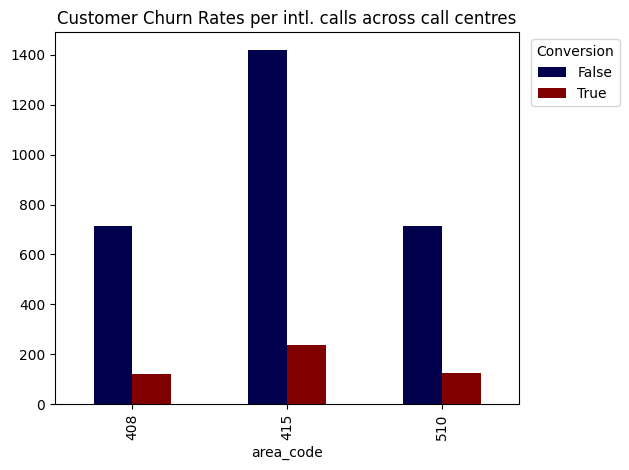

In [189]:
prop_table = pd.crosstab(index=tel['area_code'],
                         columns=tel['churn'],
                         values=tel['total_intl_calls'],
                         aggfunc='count')

prop_table.plot(kind='bar', colormap='seismic')
plt.title(label="Customer Churn Rates per intl. calls across call centres", loc='center')
plt.legend(title="Conversion", bbox_to_anchor=(1.01, 1),loc='upper left')

plt.tight_layout()

<Figure size 1500x1000 with 0 Axes>

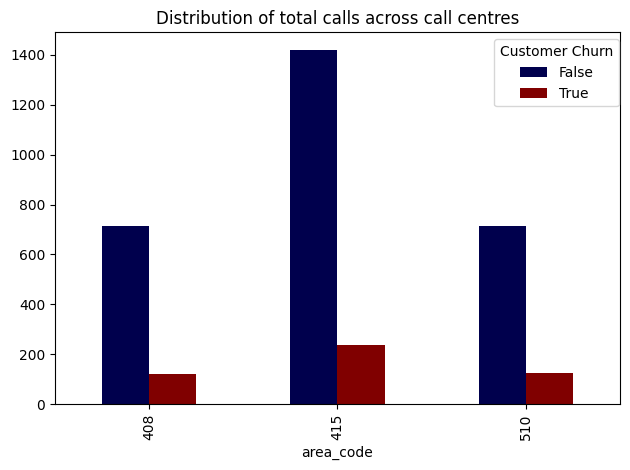

In [161]:

total_loc_calls = sum([tel['total_day_calls'], tel['total_eve_calls'], tel['total_eve_calls']],start=0)

prop_table = pd.crosstab(index=tel['area_code'], columns=tel['churn'],
                         values=total_loc_calls, aggfunc='count')

plt.figure(figsize=(15, 10))
prop_table.plot(kind='bar', colormap='seismic')
plt.title(label="Distribution of total calls across call centres",loc='center')
plt.legend(title="Customer Churn", bbox_to_anchor=(1.01, 1), loc='upper right')

plt.tight_layout()
plt.show()

**International Plan**

<Figure size 1500x1000 with 0 Axes>

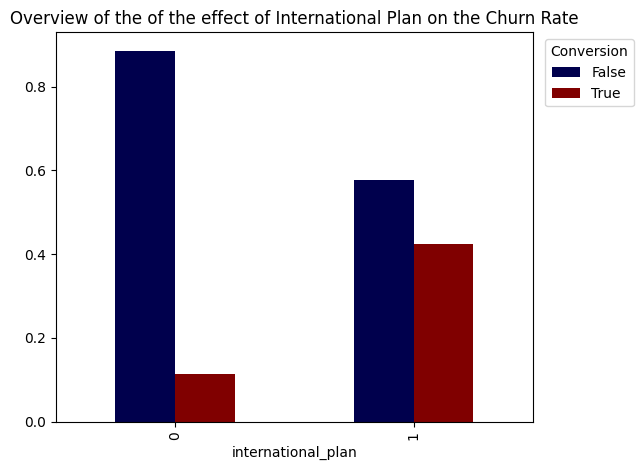

In [165]:
prop_table = pd.crosstab(index=tel['international_plan'], columns=tel['churn'],normalize='index')

plt.figure(figsize=(15, 10))
prop_table.plot(kind='bar', colormap='seismic')
plt.title(label="Overview of the of the effect of International Plan on the Churn Rate",loc='center')
plt.legend(title="Conversion", bbox_to_anchor=(1.01, 1),loc='upper left')

plt.tight_layout()
plt.show()

**Voice Mail Plan**

<Figure size 1500x1000 with 0 Axes>

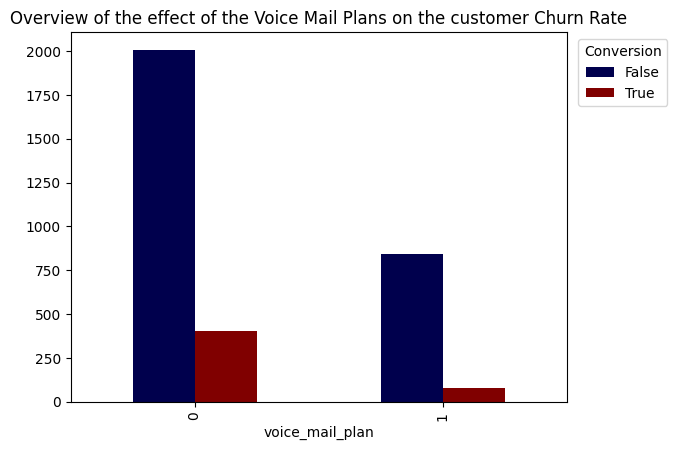

In [178]:
prop_table = pd.crosstab(index=tel['voice_mail_plan'], 
                        columns=tel['churn'], values=tel.index.size,aggfunc='count')
plt.figure(figsize=(15, 10))

prop_table.plot(kind='bar', colormap='seismic')
plt.title(label="Overview of the effect of the Voice Mail Plans on the customer Churn Rate")
plt.legend(title="Conversion", bbox_to_anchor=(1.01, 1), loc='upper left')

## Data Preparation

In [ ]:
print("Overview of Numerical Variables: \n{}".format(pd.DataFrame(numerical_predictors,columns=[""])))

Overview of Numerical Variables: 
                          
0           account_length
1    number_vmail_messages
2        total_day_minutes
3          total_day_calls
4         total_day_charge
5        total_eve_minutes
6          total_eve_calls
7         total_eve_charge
8      total_night_minutes
9        total_night_calls
10      total_night_charge
11      total_intl_minutes
12        total_intl_calls
13       total_intl_charge
14  customer_service_calls


In [203]:
print("Overview of Categorical Predictors: \n{}".format(pd.DataFrame(categorical_predictors,columns=[""])))

Overview of Categorical Predictors: 
                     
0               state
1           area_code
2  international_plan
3     voice_mail_plan


In [ ]:
# Objectives:
    # Apply binary encoding on target variable ['churn']
    # Combine the totals into total_local_calls, total_intl_calls
    # Remove Variables with high correlations ()
    # Rename Area Code into Call Center 1, 2, 3
    # Factor strings

In [ ]:
# We apply binary encoding on the target variable

for i in range(len(tel['churn'])):
    if(tel['churn'][i] == False):
        tel['churn'][i] = 0
    else:
        tel['churn'][i] = 1


print(tel['churn'][1:20])

In [ ]:
# We create a copy since we plan to apply major changes
mod_dat = tel.copy()

In [ ]:
total_local_calls = sum([mod_dat['total_day_calls'], mod_dat['total_eve_calls'], mod_dat['total_night_calls']], start=0)
total_local_minutes = sum([mod_dat['total_day_minutes'], mod_dat['total_eve_minutes'], mod_dat['total_night_minutes']], start=0)
total_local_charge = sum([mod_dat['total_day_charge'], mod_dat['total_eve_charge'], mod_dat['total_night_charge']], start=0)

mod_dat['total_local_calls'] = total_local_calls
mod_dat['total_local_minutes'] = total_local_minutes
mod_dat['total_local_charge'] = total_local_charge



In [232]:
drop_cols = ['total_day_calls', 'total_eve_calls', 'total_night_calls', 
            'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
            'total_day_charge', 'total_eve_charge', 'total_night_charge']

# mod_dat = mod_dat.drop(drop_cols,axis=1)

print(pd.DataFrame(mod_dat.columns))

                         0
0                    state
1           account_length
2                area_code
3       international_plan
4          voice_mail_plan
5    number_vmail_messages
6       total_intl_minutes
7         total_intl_calls
8        total_intl_charge
9   customer_service_calls
10                   churn
11       total_local_calls
12     total_local_minutes
13      total_local_charge


In [ ]:
relvar = ['account_length', 'number_vmail_messages', 'total_intl_minutes', 
          'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 
          'total_local_calls', 'total_local_minutes', 'total_local_charge', 'churn']

plt.figure(figsize=(12, 7))
ax = sns.heatmap(data=mod_dat[relvar].corr(), annot=True)


In [238]:
to_drop = ['total_local_charge', 'total_intl_charge']

# mod_dat = mod_dat.drop(to_drop, axis = 1)

print(pd.DataFrame(mod_dat.columns))

                         0
0                    state
1           account_length
2                area_code
3       international_plan
4          voice_mail_plan
5    number_vmail_messages
6       total_intl_minutes
7         total_intl_calls
8   customer_service_calls
9                    churn
10       total_local_calls
11     total_local_minutes


In [ ]:
relvar = ['account_length', 'number_vmail_messages', 'total_intl_minutes', 
          'total_intl_calls', 'customer_service_calls', 
          'total_local_calls', 'total_local_minutes', 'churn']

plt.figure(figsize=(12, 7))

ax = sns.heatmap(data=mod_dat[relvar].corr(), annot=True)

In [ ]:
# 415: Area Code: San Francisco (Class: 0)
# 408: Area Code: San Jose (Class: 1)
# 510: Area Code: Oakland(Class: 2)
print(mod_dat['area_code'].unique())

print(mod_dat['area_code'].dtype)

[415 408 510]
int64


In [ ]:
for i in range(len(mod_dat['area_code'])):
    if(mod_dat['area_code'][i] == 415):
        mod_dat['area_code'][i] = "San Francisco"
    if(mod_dat['area_code'][i] == 408):
        mod_dat['area_code'][i] = "San Jose"
    else:
        mod_dat['area_code'][i] = "Oakland"
 



In [262]:
mod_dat = mod_dat.rename(columns={'area_code': 'call_center'})

print(mod_dat['call_center'])


0       2
1       2
2       2
3       1
4       2
       ..
3328    2
3329    2
3330    2
3331    2
3332    2
Name: call_center, Length: 3333, dtype: object


In [313]:
objects = ['call_center', 'international_plan', 'voice_mail_plan', 'churn']

def conv_numeric(df):
    for variable in objects:
            df[variable] = pd.to_numeric(df[variable])
    
    return df


mod_dat = conv_numeric(mod_dat)

mod_dat['state'] = pd.factorize(mod_dat['state'])[0]


print(mod_dat.dtypes)

state                       int64
account_length              int64
call_center                 int64
international_plan          int64
voice_mail_plan             int64
number_vmail_messages       int64
total_intl_minutes        float64
total_intl_calls            int64
customer_service_calls      int64
churn                       int64
total_local_calls           int64
total_local_minutes       float64
dtype: object


In [314]:
print("Final set of variables: \n{}".format(pd.DataFrame(data=mod_dat.columns, columns=["Variable Name"])))

Final set of variables: 
             Variable Name
0                    state
1           account_length
2              call_center
3       international_plan
4          voice_mail_plan
5    number_vmail_messages
6       total_intl_minutes
7         total_intl_calls
8   customer_service_calls
9                    churn
10       total_local_calls
11     total_local_minutes


## Modelling

**Data Preparation**

In [315]:
X_sel = ['state','account_length', 'call_center','international_plan','voice_mail_plan','number_vmail_messages', 'total_intl_minutes', 
          'total_intl_calls', 'customer_service_calls', 
          'total_local_calls', 'total_local_minutes']
X = mod_dat[X_sel]

y = mod_dat['churn']

In [316]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

In [317]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))

print("\nShape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (2666, 11)
Shape of X_test: (667, 11)

Shape of y_train: (2666,)
Shape of y_test: (667,)


**Logistic Regression**

In [319]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=10000)

logr.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [320]:
print("Score on training set: {: .4f}".format(logr.score(X_train, y_train)))
print("Score on test set: {: .4f}".format(logr.score(X_test, y_test)))

Score on training set:  0.8638
Score on test set:  0.8591


In [ ]:
logr = LogisticRegression(max_iter=10000,l1_ratio=0,solver='newton-cg')

logr.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [ ]:
print("Score on training set: {: .4f}".format(logr.score(X_train, y_train)))
print("Score on test set: {: .4f}".format(logr.score(X_test, y_test)))

Score on training set:  0.8642
Score on test set:  0.8591


**Support Vector Machines**

In [384]:
from sklearn.svm import SVC

svm = SVC(max_iter=10000)

svm.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [385]:
print("Accuracy on train set: {: .4f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {: .4f}".format(svm.score(X_test, y_test)))

Accuracy on train set:  0.8567
Accuracy on test set:  0.8486


In [386]:
# Scaling

# Computing the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range, afterward min = 0 and max = 1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature: \n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature: \n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature: 
state                     0.0
account_length            0.0
call_center               0.0
international_plan        0.0
voice_mail_plan           0.0
number_vmail_messages     0.0
total_intl_minutes        0.0
total_intl_calls          0.0
customer_service_calls    0.0
total_local_calls         0.0
total_local_minutes       0.0
dtype: float64
Maximum for each feature: 
state                     1.0
account_length            1.0
call_center               1.0
international_plan        1.0
voice_mail_plan           1.0
number_vmail_messages     1.0
total_intl_minutes        1.0
total_intl_calls          1.0
customer_service_calls    1.0
total_local_calls         1.0
total_local_minutes       1.0
dtype: float64


In [388]:
# Using the same info on the test set we get
X_test_scaled = (X_test - min_on_training) / range_on_training

In [390]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [391]:
print("Accuray on the training set: {: .4f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {: .4f}".format(svc.score(X_test_scaled, y_test)))

Accuray on the training set:  0.8781
Accuracy on the test set:  0.8621


In [404]:
svc = SVC(max_iter=100000, C=3, kernel='poly')
svc.fit(X_train_scaled, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",3
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'poly'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [405]:
print("Accuray on the training set: {: .4f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {: .4f}".format(svc.score(X_test_scaled, y_test)))

Accuray on the training set:  0.9044
Accuracy on the test set:  0.8921


In [429]:
svc = SVC(max_iter=100000, kernel='poly', degree=4)
svc.fit(X_train_scaled, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'poly'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",4
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [430]:
print("Accuray on the training set: {: .4f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on the test set: {: .4f}".format(svc.score(X_test_scaled, y_test)))

Accuray on the training set:  0.9141
Accuracy on the test set:  0.8981
